# Setup and cleaning

Import the packages we will be using.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load the data and get a feel for it.

In [2]:
df = pd.read_csv("NBAplayerstats201415.csv")
df.head()

,Name,Games Played,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,...,Age,Birth_Place,Birthdate,Collage,Experience,Height,Pos,Team,Weight,BMI
0,AJ Price,26,324,133,51,137,37.2,15,57,26.3,...,29.0,us,"October 7, 1986",University of Connecticut,5,185.0,PG,PHO,81.45,23.798393
1,Aaron Brooks,82,1885,954,344,817,42.1,121,313,38.7,...,30.0,us,"January 14, 1985",University of Oregon,6,180.0,PG,CHI,72.45,22.361111
2,Aaron Gordon,47,797,243,93,208,44.7,13,48,27.1,...,20.0,us,"September 16, 1995",University of Arizona,R,202.5,PF,ORL,99.00,24.142661
3,Adreian Payne,32,740,213,91,220,41.4,1,9,11.1,...,24.0,us,"February 19, 1991",Michigan State University,R,205.0,PF,ATL,106.65,25.377751
4,Al Horford,76,2318,1156,519,965,53.8,11,36,30.6,...,29.0,do,"June 3, 1986",University of Florida,7,205.0,C,ATL,110.25,26.234384


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490 entries, 0 to 489
Data columns (total 34 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          490 non-null    object 
 1   Games Played  490 non-null    int64  
 2   MIN           490 non-null    int64  
 3   PTS           490 non-null    int64  
 4   FGM           490 non-null    int64  
 5   FGA           490 non-null    int64  
 6   FG%           490 non-null    float64
 7   3PM           490 non-null    int64  
 8   3PA           490 non-null    int64  
 9   3P%           490 non-null    float64
 10  FTM           490 non-null    int64  
 11  FTA           490 non-null    int64  
 12  FT%           490 non-null    float64
 13  OREB          490 non-null    int64  
 14  DREB          490 non-null    int64  
 15  REB           490 non-null    int64  
 16  AST           490 non-null    int64  
 17  STL           490 non-null    int64  
 18  BLK           490 non-null    

Rename some of the columns.

In [4]:
df = df.rename(columns = {'Birth_Place' : 'Birthplace', 'Collage' : 'College', 'Pos' : 'Position'})

Looking at the raw data, there are null entries in many columns. However, the majority of these columns have null values for the same few players. (The only exception is the 'College' column, but we will be unlikely to use this column in our analysis.)

In [5]:
for column in df:
    print([column, df[column].isna().sum()])

['Name', 0]
['Games Played', 0]
['MIN', 0]
['PTS', 0]
['FGM', 0]
['FGA', 0]
['FG%', 0]
['3PM', 0]
['3PA', 0]
['3P%', 0]
['FTM', 0]
['FTA', 0]
['FT%', 0]
['OREB', 0]
['DREB', 0]
['REB', 0]
['AST', 0]
['STL', 0]
['BLK', 0]
['TOV', 0]
['PF', 0]
['EFF', 0]
['AST/TOV', 0]
['STL/TOV', 0]
['Age', 68]
['Birthplace', 68]
['Birthdate', 68]
['College', 140]
['Experience', 68]
['Height', 68]
['Position', 68]
['Team', 68]
['Weight', 68]
['BMI', 68]


There are 68 players with these null values, out of the total 490. This is quite a large proportion. In a real-life scenario, it would be best to look into exactly why these null values have appeared. As this is just a dataset off of Kaggle, there is not much we can do about it, so I will drop them before continuing.

In [6]:
# drop these players
df = df[df['Age'].notnull()]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 422 entries, 0 to 489
Data columns (total 34 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          422 non-null    object 
 1   Games Played  422 non-null    int64  
 2   MIN           422 non-null    int64  
 3   PTS           422 non-null    int64  
 4   FGM           422 non-null    int64  
 5   FGA           422 non-null    int64  
 6   FG%           422 non-null    float64
 7   3PM           422 non-null    int64  
 8   3PA           422 non-null    int64  
 9   3P%           422 non-null    float64
 10  FTM           422 non-null    int64  
 11  FTA           422 non-null    int64  
 12  FT%           422 non-null    float64
 13  OREB          422 non-null    int64  
 14  DREB          422 non-null    int64  
 15  REB           422 non-null    int64  
 16  AST           422 non-null    int64  
 17  STL           422 non-null    int64  
 18  BLK           422 non-null    

The 'Age' and 'Experience' columns should be made up of integers .

In the 'Experience' column, there is a mix of integers and strings. Namely, 'R' is used to denote that a player is a rookie. In other words, they have 0 full years of experience.

In [7]:
# convert any 'R's to '0's
df['Experience'] = df['Experience'].str.replace("R","0")
# convert to integers
df['Experience'] = df['Experience'].astype(int)
# double-check we have done so successfully
df.Experience.apply(type).value_counts()

<class 'int'>    422
Name: Experience, dtype: int64

In [8]:
# convert to 'Age' column to integers
df['Age'] = df['Age'].astype(int)
# double-check we have done so successfully
df.Age.apply(type).value_counts()

<class 'int'>    422
Name: Age, dtype: int64

# Exploratory Data Analysis

## Univariate Case
For the purpose of practice, we will perform EDA on one column only to start with. i.e. on a univariate dataset. We choose the points or 'PTS' column.

In [9]:
df1 = df['PTS']
df1.describe()

count     422.000000
mean      515.890995
std       426.260325
min         0.000000
25%       154.250000
50%       432.000000
75%       788.750000
max      2217.000000
Name: PTS, dtype: float64

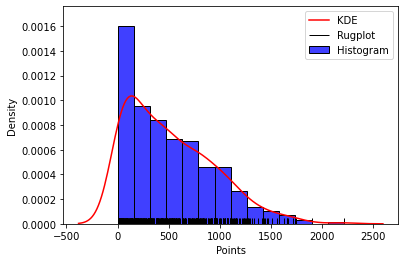

In [10]:
kdeAxes = sns.kdeplot(df1, color = 'red', label = 'KDE')
histAxes = sns.histplot(df1, stat = 'density', color = 'blue', label = 'Histogram')
rugAxes = sns.rugplot(df1, color = 'black', label = 'Rugplot')

plt.legend();
plt.xlabel("Points");

In [11]:
df[df['PTS'] == df['PTS'].max()]['Name']

194    James Harden
Name: Name, dtype: object

The player with the most points in the 2014-15 NBA season was James Harden! (My favourite player, I have his shoes).

## Multivariate Cases
Next, we focus in on 2 or more columns and play around with some visualisations.

### 2 columns
We create some visualisations, just looking at the 'PTS' and 'MIN' columns, i.e. the points and minutes played columns.

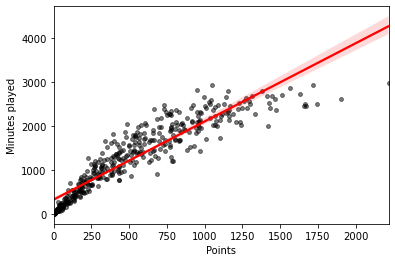

In [12]:
ax = sns.regplot(data = df, x = 'PTS', y = 'MIN',
           scatter_kws = {'color':'black', 'alpha' : 0.5, 's':15},
           line_kws = {'color':'red'})

plt.xlabel("Points");
plt.ylabel("Minutes played");

We have fitted a straight line of regression to this plot, but it looks like polynomial regression may be better suited.

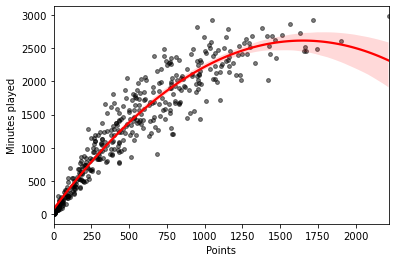

In [13]:
ax = sns.regplot(data = df, x = 'PTS', y = 'MIN',
           scatter_kws = {'color':'black', 'alpha' : 0.5, 's':15},
           line_kws = {'color':'red'},
            order = 2)

plt.xlabel("Points");
plt.ylabel("Minutes played");

The curve downwards at the end is not ideal, so there may be a better way to fit the line of regression.

(array([   0.,  250.,  500.,  750., 1000., 1250., 1500., 1750., 2000.,
       2250.]), [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])


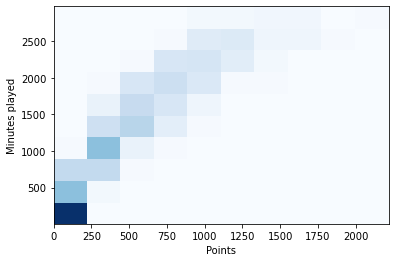

In [21]:
ax = plt.hist2d(data = df, x = 'PTS', y = 'MIN', cmap = 'Blues');

plt.xlabel("Points");
plt.ylabel("Minutes played");

A 2D histogram is not as clear a method of visualisation in this case.

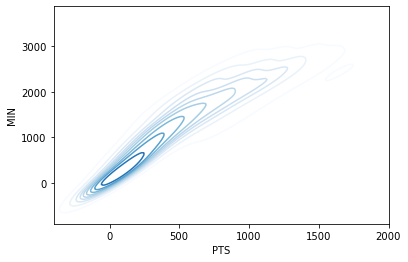

In [15]:
sns.kdeplot(data = df, x ='PTS', y = 'MIN', cmap = 'Blues')
plt.xlim(-400,2000);

A kernel density estimate contour plot is also somewhat unclear. It does not show the players with more than 1500 points clearly at all.

### 3 columns
We can visualise 3 columns by using a 3D plot of some kind.

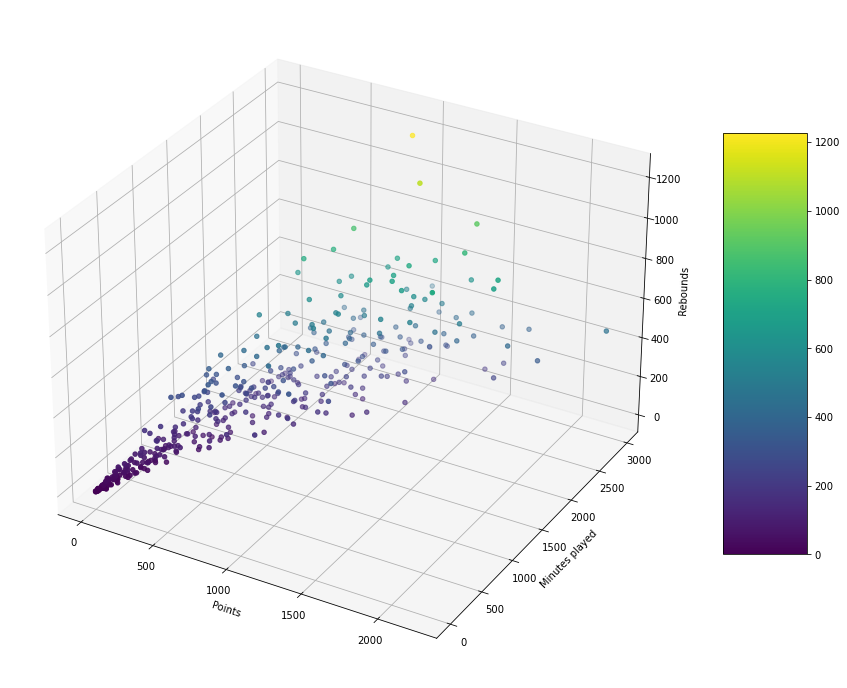

In [16]:
# import the 3d plotting module
from mpl_toolkits import mplot3d

# set up the figure
fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(projection = '3d')

# plot the data, add colouring for the z axis for extra clarity
g = ax.scatter3D(df['PTS'], df['MIN'], df['REB'], c = df['REB'])

# add labels
ax.set_xlabel('Points')
ax.set_ylabel('Minutes played')
ax.set_zlabel('Rebounds')

# add a colourbar
fig.colorbar(g, ax = ax, shrink = 0.5, aspect = 5)

# display plot
plt.tight_layout()
plt.show()

### 4 columns
We can even extend to 4 columns (or further) by considering the size of markers, although this becomes increasingly hard to read and understand.

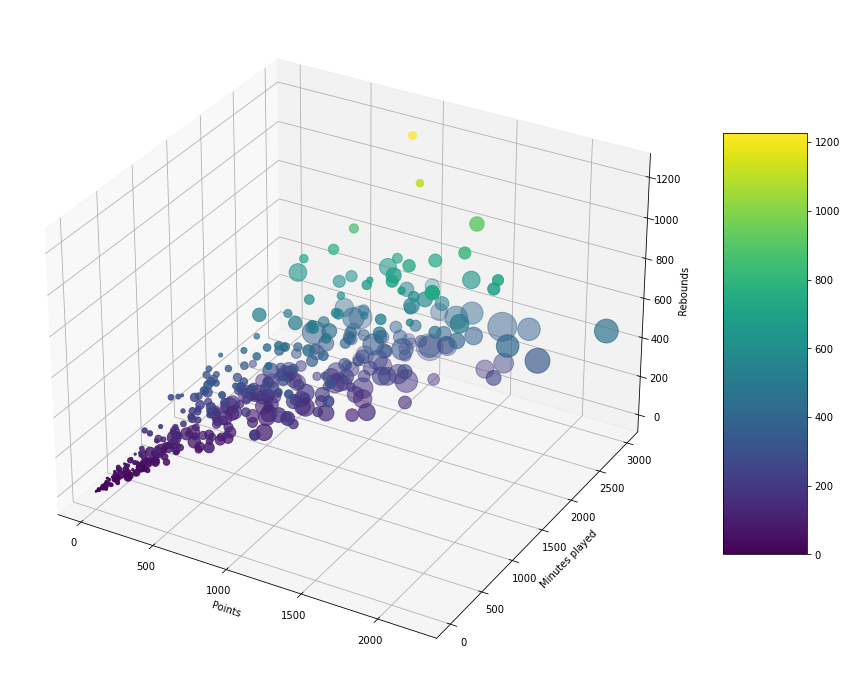

In [17]:
# import the 3d plotting module
from mpl_toolkits import mplot3d

# set up the figure
fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(projection = '3d')

# plot the data, add colouring for the z axis for extra clarity
# add sizing of the markers for the 'Assists' column
ax.scatter3D(df['PTS'], df['MIN'], df['REB'], c = df['REB'], s = df['AST'])

# add labels
ax.set_xlabel('Points')
ax.set_ylabel('Minutes played')
ax.set_zlabel('Rebounds')

# add a colourbar
fig.colorbar(g, ax = ax, shrink = 0.5, aspect = 5)

# display plot
plt.tight_layout()
plt.show()

A much nicer, alternative way to observe connections between multiple columns is by using pairplots.

In [18]:
# setup some variables for use in the pairplots

column_names = ['Points', 'Minutes played', 'Rebounds', 'Assists']

X = np.array(df[['PTS','MIN','REB','AST']])
print(X)

[[ 133  324   32   46]
 [ 954 1885  166  261]
 [ 243  797  169   33]
 ...
 [1143 2304  747  153]
 [ 606 1730  500  178]
 [  28   75    8    5]]


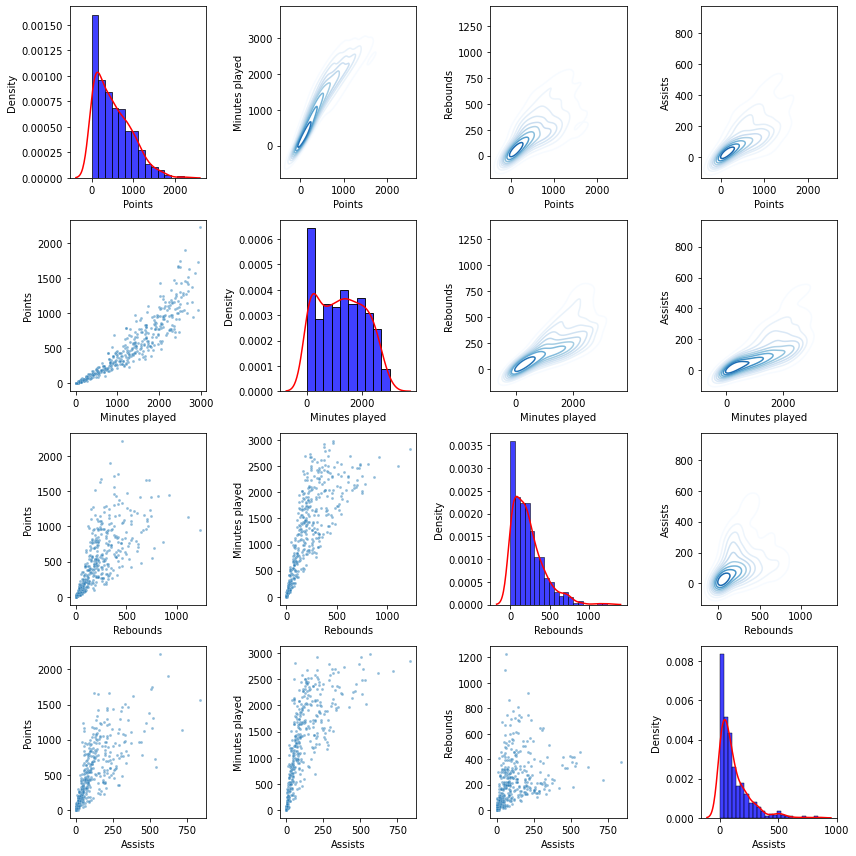

In [19]:
# create the figure
plt.figure(figsize = (12,12))

# i and j are coordinates for each of the graphs
for i in range(0,4):
    for j in range(0,4):
        # determine the positioning of each graph
        plt.subplot(4, 4, (4*i)+j+1)
        # plot joint histogram and KDE plots along the diagonal
        if i == j:
            sns.kdeplot(X[:,i], color = 'red')
            sns.histplot(X[:,i], stat = 'density', color = 'blue')
            plt.xlabel(column_names[i])
        # plot scatterplots below the diagonal
        if i > j:
            sns.scatterplot(x = X[:,i], y = X[:,j], alpha = 0.5, s = 8)
            plt.xlabel(column_names[i])
            plt.ylabel(column_names[j])
        # plot 2D KDE contour plots above the diagonal
        if j > i:
            sns.kdeplot(x = X[:,i], y = X[:,j], cmap = 'Blues')
            plt.xlabel(column_names[i])
            plt.ylabel(column_names[j])
    
plt.tight_layout()
plt.show()